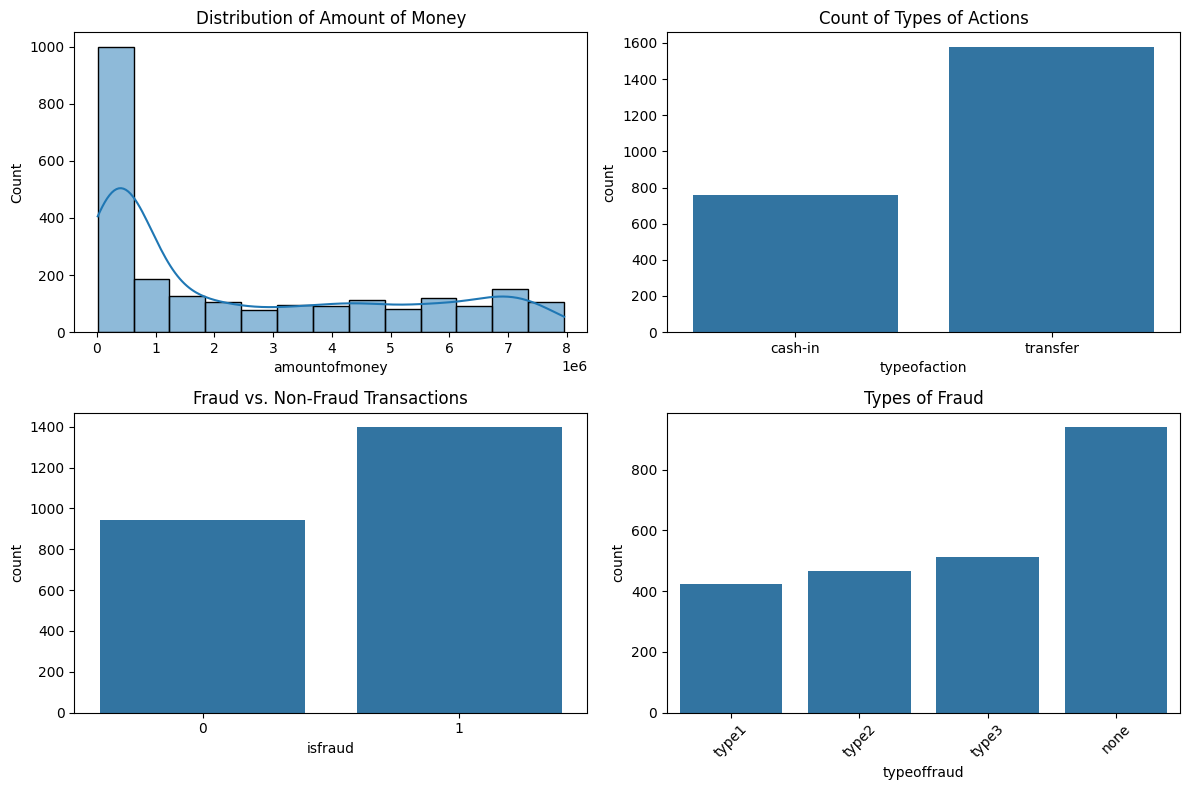

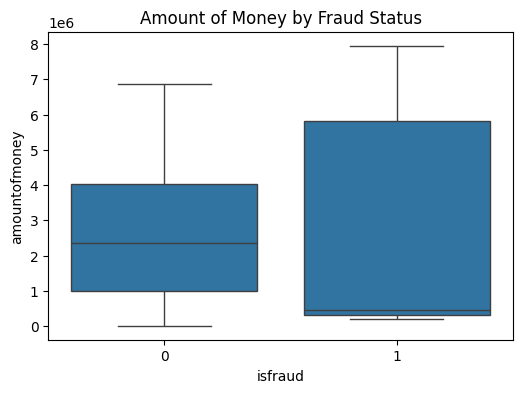

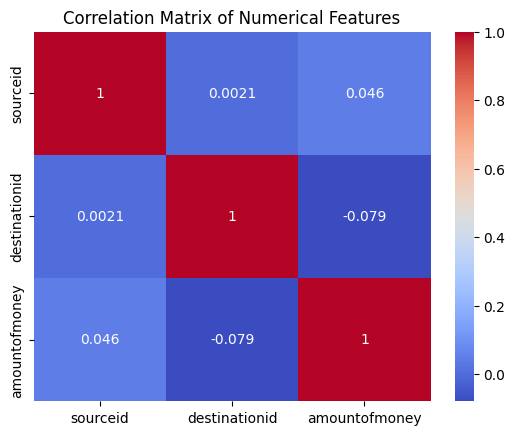

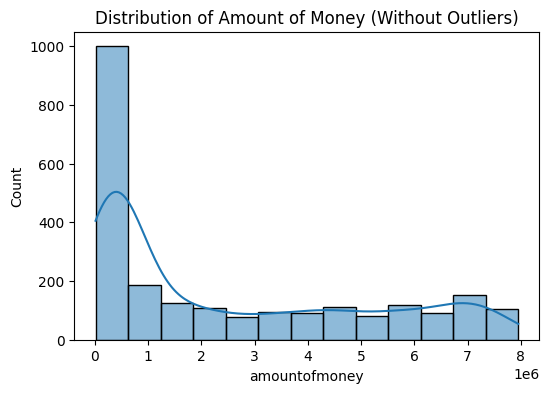

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

data = pd.read_csv('/content/base_data.csv')

data['date'] = pd.to_datetime(data['date'])

data['isfraud'] = data['isfraud'].astype('category')

data[['amountofmoney']].describe()


data[['typeofaction', 'typeoffraud', 'isfraud']].describe()


plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
sns.histplot(data['amountofmoney'], kde=True)
plt.title('Distribution of Amount of Money')

plt.subplot(2,2,2)
sns.countplot(x='typeofaction', data=data)
plt.title('Count of Types of Actions')

plt.subplot(2,2,3)
sns.countplot(x='isfraud', data=data)
plt.title('Fraud vs. Non-Fraud Transactions')

plt.subplot(2,2,4)
sns.countplot(x='typeoffraud', data=data)
plt.title('Types of Fraud')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(6, 4))
sns.boxplot(x='isfraud', y='amountofmoney', data=data)
plt.title('Amount of Money by Fraud Status')
plt.show()


correlation_matrix = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


z_scores = zscore(data['amountofmoney'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data_clean = data[filtered_entries]


plt.figure(figsize=(6, 4))
sns.histplot(data_clean['amountofmoney'], kde=True)
plt.title('Distribution of Amount of Money (Without Outliers)')
plt.show()
